## PAD - Project 1

### Reading data
https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set

Ambient temperature (AT) C \
Ambient pressure (AP) mbar \
Ambient humidity (AH) (%) \
Air filter difference pressure (AFDP) mbar \
Gas turbine exhaust pressure (GTEP) mbar \
Turbine inlet temperature (TIT) C \
Turbine after temperature (TAT) C \
Compressor discharge pressure (CDP) mbar \
Turbine energy yield (TEY) MWH \
Carbon monoxide (CO) mg/m3 \
Nitrogen oxides (NOx) mg/m3 

In [1]:
import pandas as pd
import numpy as np
import pickle

raw_data = pd.read_csv('gt_2011.csv')

### Data Visualization

<AxesSubplot:>

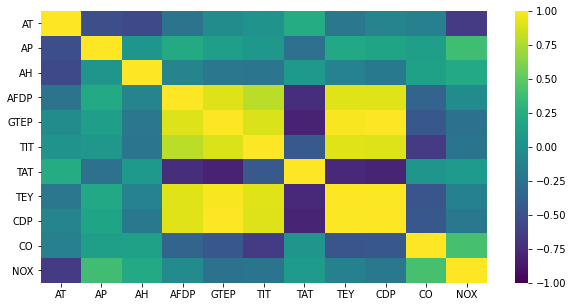

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.heatmap(raw_data.corr(), cmap = 'viridis', vmin=-1, vmax=1)

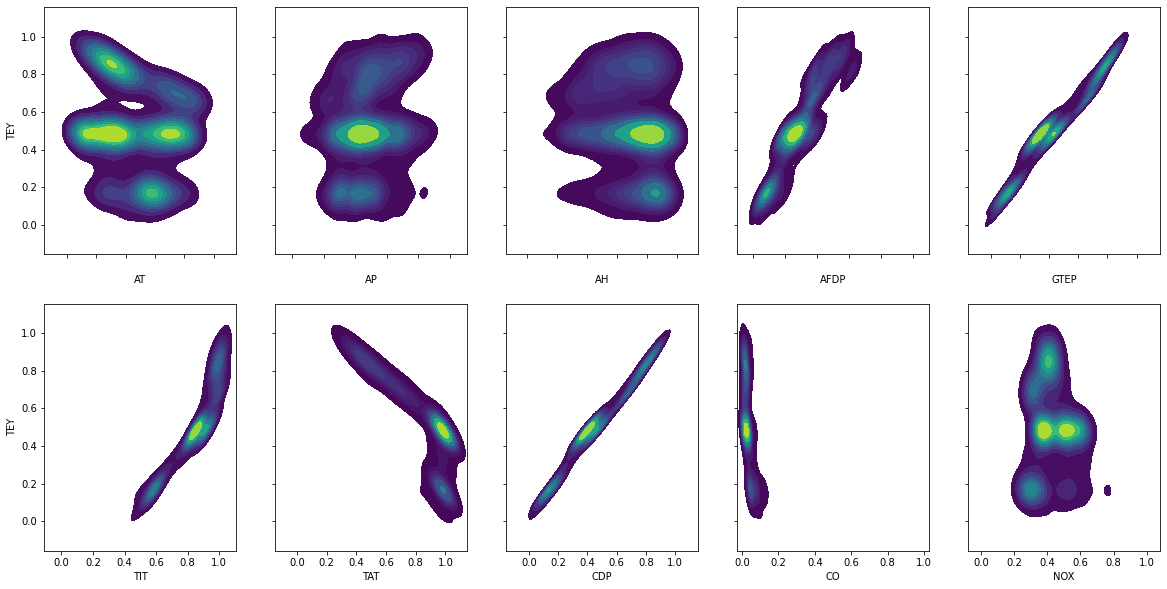

In [30]:
cols = raw_data.columns.delete(7)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(raw_data)
norm_data = pd.DataFrame(norm_data, columns= raw_data.columns)
plt.figure(figsize=(20,10))
for i in range(len(cols)):

    plt.subplot(2,5,i+1)
    sns.kdeplot(x = norm_data[cols[i]],y = norm_data['TEY'], fill=True, cmap='viridis')
    plt.xticks(ticks=[0.0,0.2,0.4,0.6,0.8,1.0])
    if i != 0 and i!= 5:
        plt.ylabel('')
        plt.yticks(color ='white')

    if i < 5:
        plt.xticks(color = 'white')
        

Text(0, 0.5, 'Turbine energy yield (MWH)')

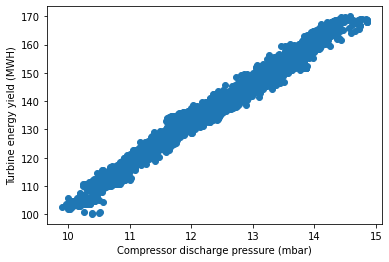

In [31]:
plt.scatter(raw_data['CDP'],raw_data['TEY'])
plt.xlabel('Compressor discharge pressure (mbar)')
plt.ylabel('Turbine energy yield (MWH)')
#cbar = plt.colorbar()
#cbar.set_label('Turbine energy yield (MWH)')
